# **Team Members:**
1. Asmaa Mohamed (team Leader)
2. Kholoud Abdelmohsen
3. Roaa Ahraf
4. Mariam Ashraf
5. Vivianne Maged

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/monkeypoxskinimagedataset/Monkeypox Skin Image Dataset/Monkeypox/monkeypox235.png
/kaggle/input/monkeypoxskinimagedataset/Monkeypox Skin Image Dataset/Monkeypox/monkeypox273.png
/kaggle/input/monkeypoxskinimagedataset/Monkeypox Skin Image Dataset/Monkeypox/monkeypox270.png
/kaggle/input/monkeypoxskinimagedataset/Monkeypox Skin Image Dataset/Monkeypox/monkeypox132.png
/kaggle/input/monkeypoxskinimagedataset/Monkeypox Skin Image Dataset/Monkeypox/monkeypox258.png
/kaggle/input/monkeypoxskinimagedataset/Monkeypox Skin Image Dataset/Monkeypox/monkeypox67.png
/kaggle/input/monkeypoxskinimagedataset/Monkeypox Skin Image Dataset/Monkeypox/monkeypox200.png
/kaggle/input/monkeypoxskinimagedataset/Monkeypox Skin Image Dataset/Monkeypox/monkeypox45.png
/kaggle/input/monkeypoxskinimagedataset/Monkeypox Skin Image Dataset/Monkeypox/monkeypox133.png
/kaggle/input/monkeypoxskinimagedataset/Monkeypox Skin Image Dataset/Monkeypox/monkeypox87.png
/kaggle/input/monkeypoxskinimagedataset/Mon

# **Flow of Our Project**
1. Data Exploring
2. Data Augmentation
3. Preprocessing
4. Feature Extraction
5. Model Comparison

# Importing The nessecary Libraries

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
from PIL import Image
import os
import cv2
import glob 
import os
import numpy as np
import random
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc

# 1. Data Exploring

We first the directory containing sub directories of the classes to a dataframe, beacuse dealing with a dataframe is so much easier to help us in getting insights of the data that we are dealing with

In [16]:
BASE_DIR = '/kaggle/input/monkeypoxskinimagedataset/Monkeypox Skin Image Dataset/'  
data = []
for subdir in sorted(os.listdir(BASE_DIR)):
    subfolder_path = os.path.join(BASE_DIR, subdir)
    if os.path.isdir(subfolder_path):
        for file_name in sorted(os.listdir(subfolder_path)):
            file_path = os.path.join(subfolder_path, file_name)
            try:
                with Image.open(file_path) as img:
                    width, height = img.size
                    channels = len(img.getbands())
                    data.append({
                        'image_path': file_path,
                        'height': height,
                        'width': width,
                        'channels': channels,
                        'label': subdir
                    })
            except Exception as e:
                print(f"Error processing file {file_path}: {e}")
dataset= pd.DataFrame(data)

In [17]:
dataset.head()

,image_path,height,width,channels,label
0,/kaggle/input/monkeypoxskinimagedataset/Monkey...,224,224,3,Chickenpox
1,/kaggle/input/monkeypoxskinimagedataset/Monkey...,224,224,3,Chickenpox
2,/kaggle/input/monkeypoxskinimagedataset/Monkey...,224,224,3,Chickenpox
3,/kaggle/input/monkeypoxskinimagedataset/Monkey...,224,224,3,Chickenpox
4,/kaggle/input/monkeypoxskinimagedataset/Monkey...,224,224,3,Chickenpox


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  770 non-null    object
 1   height      770 non-null    int64 
 2   width       770 non-null    int64 
 3   channels    770 non-null    int64 
 4   label       770 non-null    object
dtypes: int64(3), object(2)
memory usage: 30.2+ KB


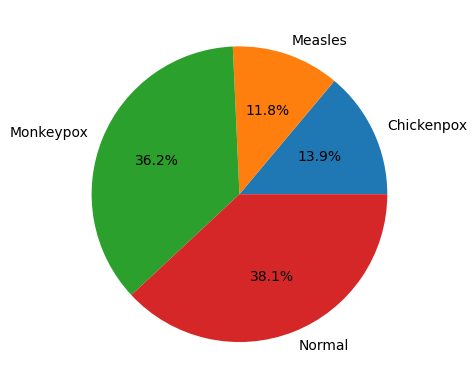

In [21]:
counts = dataset.groupby('label').size()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.show()

**the dataset is not balanced data augmentation is needed**

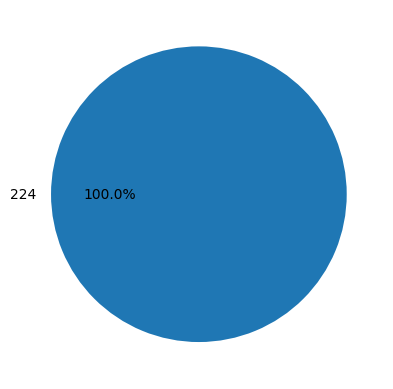

In [22]:
counts = dataset.groupby('width').size()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.show()

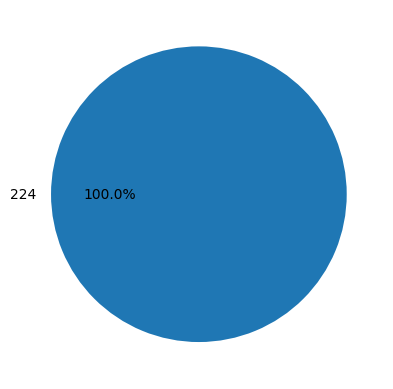

In [23]:
counts = dataset.groupby('height').size()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.show()

**all the images size is(224,224)**

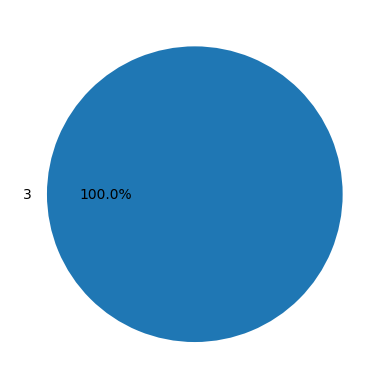

In [25]:
counts = dataset.groupby('channels').size()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.show()

**all the images are 3 channels images**

# 2. Data Augmentation

In [27]:
datagen = ImageDataGenerator(
    rotation_range=30,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='reflect'
)

**data augmentation to the smallest no. images of category measeles and chickenpox**

In [ ]:
input_dir = '/kaggle/input/monkeypoxskinimagedataset/Monkeypox Skin Image Dataset/Chickenpox'
output_dir = '/kaggle/working/chickenpox'
os.makedirs(output_dir, exist_ok=True)
max_images = 270
while len(os.listdir(output_dir)) < max_images:
    img_path = os.path.join(input_dir, random.choice(os.listdir(input_dir)))
    img = load_img(img_path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='aug', save_format='png'):
        i += 1
        if i >= 3:
            break

In [ ]:
input_dir = '/kaggle/input/monkeypoxskinimagedataset/Monkeypox Skin Image Dataset/Measles'
output_dir = '/kaggle/working/Measles'
os.makedirs(output_dir, exist_ok=True)
max_images = 270
while len(os.listdir(output_dir)) < max_images:
    img_path = os.path.join(input_dir, random.choice(os.listdir(input_dir)))
    img = load_img(img_path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='aug', save_format='png'):
        i += 1
        if i >= 3:
            break

In [29]:
src_dir = "/kaggle/input/monkeypoxskinimagedataset/Monkeypox Skin Image Dataset/Monkeypox"
dst_dir = "/kaggle/working/Monkeypox"
os.makedirs(dst_dir, exist_ok=True)
for pngfile in glob.iglob(os.path.join(src_dir, "*.png")):
    shutil.copy(pngfile, dst_dir)

In [30]:
src_dir = "/kaggle/input/monkeypoxskinimagedataset/Monkeypox Skin Image Dataset/Normal"
dst_dir = "/kaggle/working/Normal"
os.makedirs(dst_dir, exist_ok=True)
for jpgfile in glob.iglob(os.path.join(src_dir, "*.png")):
    shutil.copy(jpgfile, dst_dir)

In [46]:
BASE_DIR = '/kaggle/working/'  
adata = []
for subdir in sorted(os.listdir(BASE_DIR)):
    subfolder_path = os.path.join(BASE_DIR, subdir)
    if os.path.isdir(subfolder_path):
        for file_name in sorted(os.listdir(subfolder_path)):
            file_path = os.path.join(subfolder_path, file_name)
            try:
                with Image.open(file_path) as img:
                    width, height = img.size
                    channels = len(img.getbands())
                    adata.append({
                        'image_path': file_path,
                        'height': height,
                        'width': width,
                        'channels': channels,
                        'label': subdir
                    })
            except Exception as e:
                print(f"Error processing file {file_path}: {e}")
adataset= pd.DataFrame(adata)

In [47]:
adataset.head

<bound method NDFrame.head of                                      image_path  height  width  channels  \
0         /kaggle/working/Measles/aug_0_100.png     224    224         3   
1        /kaggle/working/Measles/aug_0_1002.png     224    224         3   
2        /kaggle/working/Measles/aug_0_1060.png     224    224         3   
3        /kaggle/working/Measles/aug_0_1140.png     224    224         3   
4        /kaggle/working/Measles/aug_0_1269.png     224    224         3   
...                                         ...     ...    ...       ...   
1109  /kaggle/working/chickenpox/aug_0_9814.png     224    224         3   
1110  /kaggle/working/chickenpox/aug_0_9824.png     224    224         3   
1111  /kaggle/working/chickenpox/aug_0_9889.png     224    224         3   
1112  /kaggle/working/chickenpox/aug_0_9916.png     224    224         3   
1113  /kaggle/working/chickenpox/aug_0_9962.png     224    224         3   

           label  
0        Measles  
1        Measles  


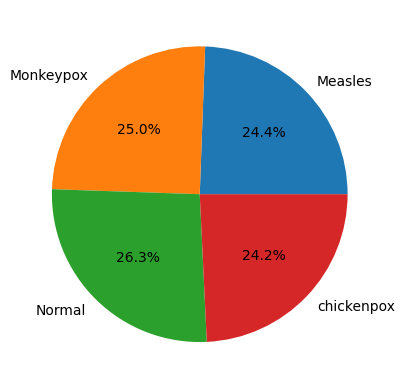

In [49]:
counts = adataset.groupby('label').size()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.show()

# 2.Preprocessing

In [50]:
#label encoding
code = {'Normal':0 ,'Monkeypox':1,'Measles':2,'chickenpox':3}
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x 

In [52]:
data_path = '/kaggle/working/'
image = []
label = []
for folder in os.listdir(data_path): 
    folder_path = os.path.join(data_path, folder) 
    files = glob.glob(os.path.join(folder_path, '*.png')) 
    for file in files:
            image_data = cv2.imread(file)
            image_array_rgb = cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB)
            image.append(image_array_rgb) 
            label.append(code.get(folder))  
print(f"Number of images: {len(image)}")
print(f"Number of labels: {len(label)}")

Number of images: 1114
Number of labels: 1114


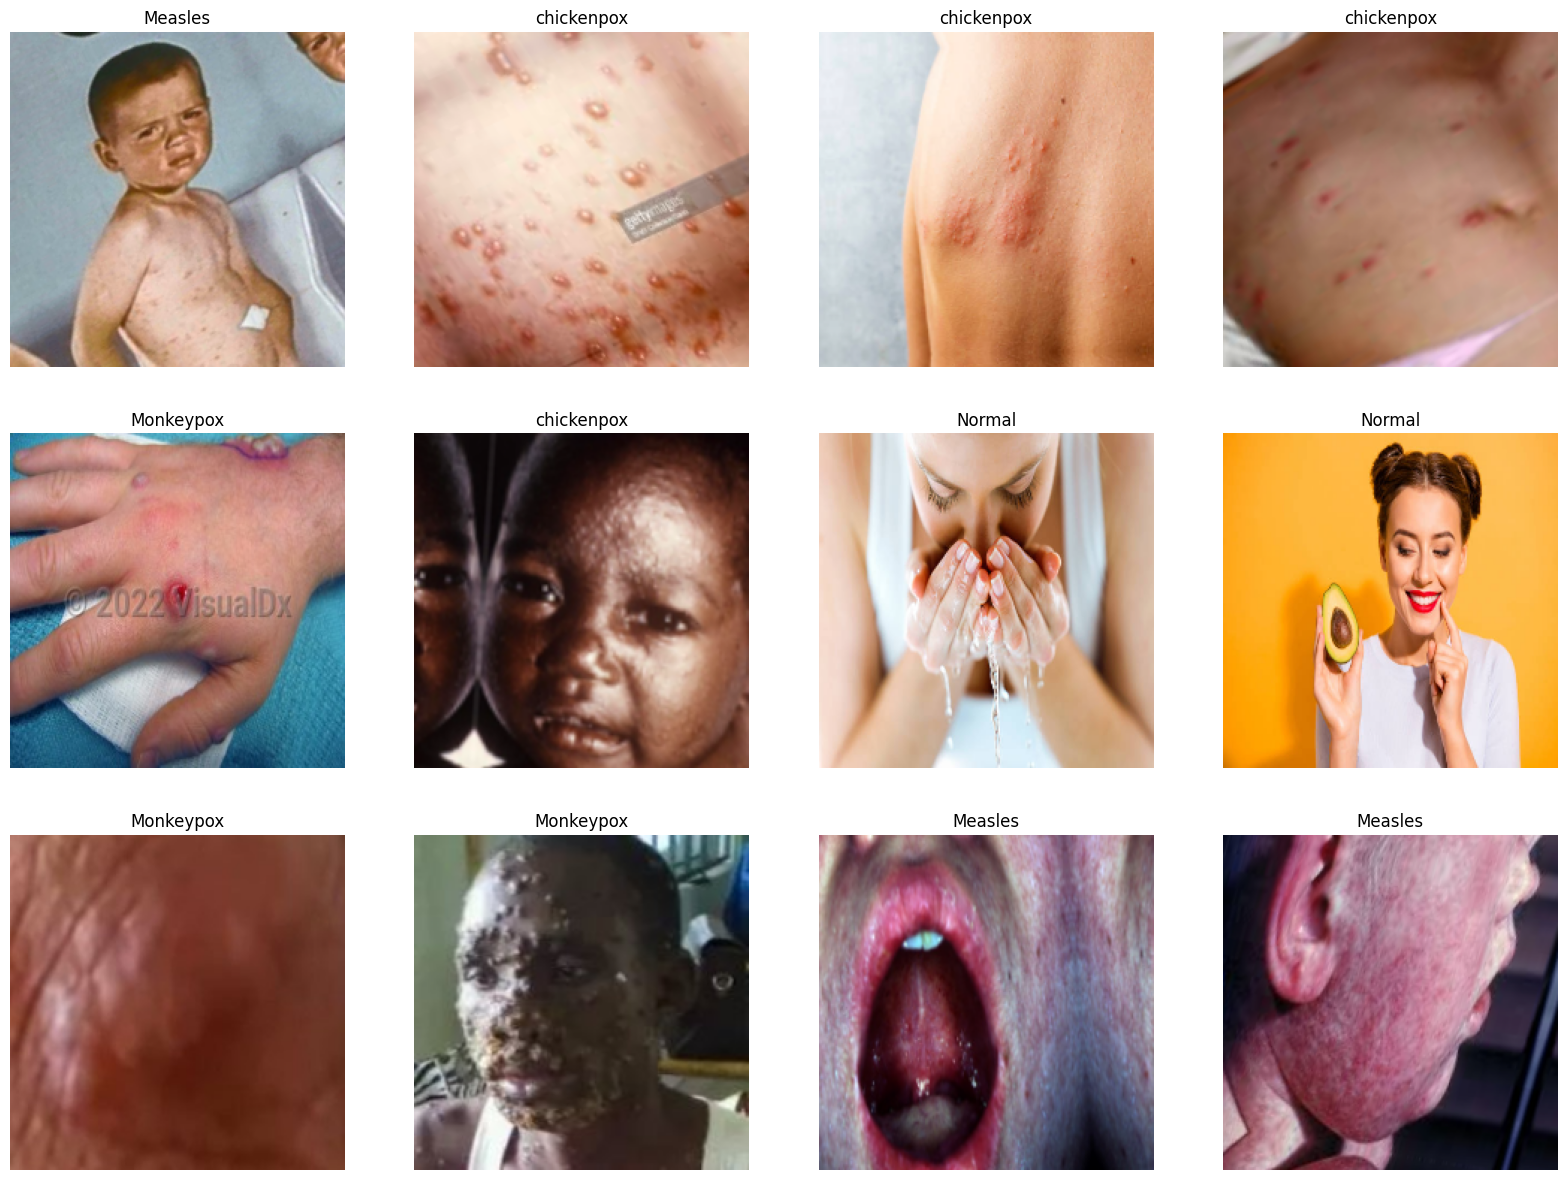

In [54]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(image),12))) : 
    plt.subplot(4,4,n+1)
    plt.imshow(image[i])   
    plt.axis('off')
    plt.title(getcode(label[i]))

# Adaptive histogram equalization

In [55]:
red_ahe_img = []
for img in image:
    red_channel, green_channel, blue_channel = cv2.split(img)
    clahe = cv2.createCLAHE(clipLimit=1,tileGridSize=(12,12))
    red_channel_eq = clahe.apply(red_channel)    
    red_ch_image_eq = cv2.merge((red_channel_eq, green_channel, blue_channel))
    red_ahe_img.append(red_ch_image_eq)
red_ahe_img = np.array(red_ahe_img)

# 4.Feature Extraction

1. Gray co-occurance matrix

In [56]:
from skimage.feature import graycomatrix, graycoprops
def extract_glcm_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    glcm = graycomatrix(gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    return [contrast, dissimilarity, homogeneity, energy, correlation]

2.Color Moment

In [58]:
def compute_color_moments(image):
    image = image.astype(np.float32)
    means = []
    variances = []
    skews = []
    channels = ('Red', 'Green', 'Blue')
    for i, channel in enumerate(channels):
        mean = np.mean(image[:, :, i])
        means.append(mean)
        variance = np.var(image[:, :, i])
        variances.append(variance)
        skewness = np.mean((image[:, :, i] - mean)**3) / (np.sqrt(variance)**3)
        skews.append(skewness)
    features = means + variances + skews
    return features

3.Local Binary Pattern

In [59]:
from skimage.feature import local_binary_pattern
def extract_lbp_features(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    lbp = local_binary_pattern(gray, P=8, R=1, method='uniform')
    n_bins = int(lbp.max() + 1)
    hist, _ = np.histogram(lbp, bins=n_bins, range=(0, n_bins), density=True)
    return hist

In [61]:
image_features = []
labels = []
for i in range(len(red_ahe_img)):
        image_array_rgb = cv2.cvtColor(red_ahe_img[i], cv2.COLOR_BGR2RGB)
        lpb=extract_lbp_features(red_ahe_img[i])
        col=compute_color_moments(red_ahe_img[i])
        glcm_features = extract_glcm_features(image_array_rgb)
        #shape_features = extract_shape_features(image_array_rgb)
        features = np.hstack([glcm_features,lpb,col])
        image_features.append(features)
        labels.append(label[i])

X = np.array(image_features)
y = np.array(labels)
print(f"Feature matrix shape: {X.shape}")
print(f"Labels shape: {y.shape}")

Feature matrix shape: (1114, 24)
Labels shape: (1114,)


Feature Extraction with the help of deep learning

In [64]:
pip install img2vec-pytorch

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [65]:
from img2vec_pytorch import Img2Vec
from PIL import Image
img2vec = Img2Vec()
features = []
labels = []
for i in range(len(red_ahe_img)):
    if isinstance(red_ahe_img[i], np.ndarray):
        img = Image.fromarray(red_ahe_img[i])
    img_features = img2vec.get_vec(img)
    features.append(img_features)
    labels.append(label[i])
print(f"Extracted features for {len(features)} images.")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 148MB/s] 


Extracted features for 1114 images.


# 5. Model Comparison

# 1. Radnom Forrest Classifier with Cross Validation with the 3 features techniques (lpb,colourmoment and glcm)

In [62]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
k_model = RandomForestClassifier(random_state=42)
y_pred = cross_val_predict(k_model, X, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)

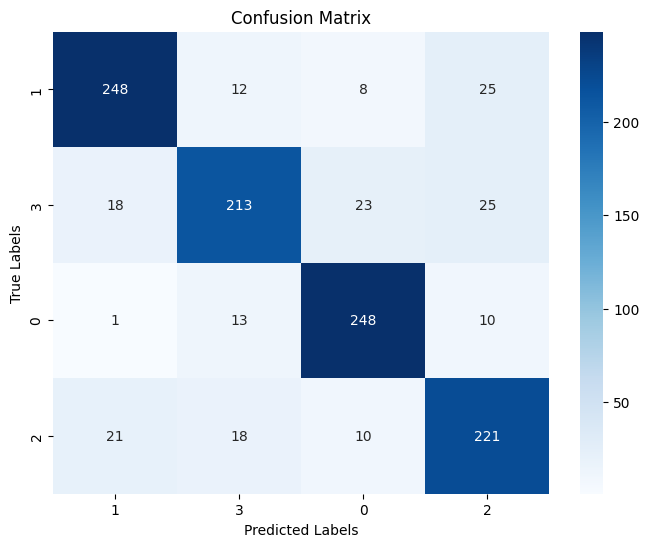

              precision    recall  f1-score   support

           1       0.86      0.85      0.85       293
           3       0.83      0.76      0.80       279
           0       0.86      0.91      0.88       272
           2       0.79      0.82      0.80       270

    accuracy                           0.83      1114
   macro avg       0.83      0.84      0.83      1114
weighted avg       0.84      0.83      0.83      1114



In [63]:
classes = ['1', '3', '0','2']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y, y_pred, target_names=classes))

# 2. XGBoost With Cross Validation with the 3 features techniques (lpb,colourmoment and glcm)

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
k1_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
y_pred1 = cross_val_predict(k1_model, X, y, cv=10)
conf_mat1 = confusion_matrix(y, y_pred1)

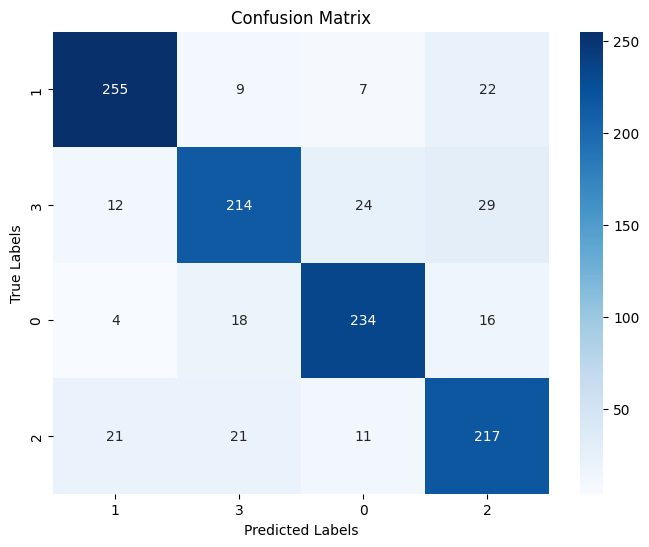

              precision    recall  f1-score   support

           1       0.87      0.87      0.87       293
           3       0.82      0.77      0.79       279
           0       0.85      0.86      0.85       272
           2       0.76      0.80      0.78       270

    accuracy                           0.83      1114
   macro avg       0.83      0.83      0.83      1114
weighted avg       0.83      0.83      0.83      1114



In [71]:
classes = ['1', '3', '0','2']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat1, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y, y_pred1, target_names=classes))

# Random Forrest With Pytorch features

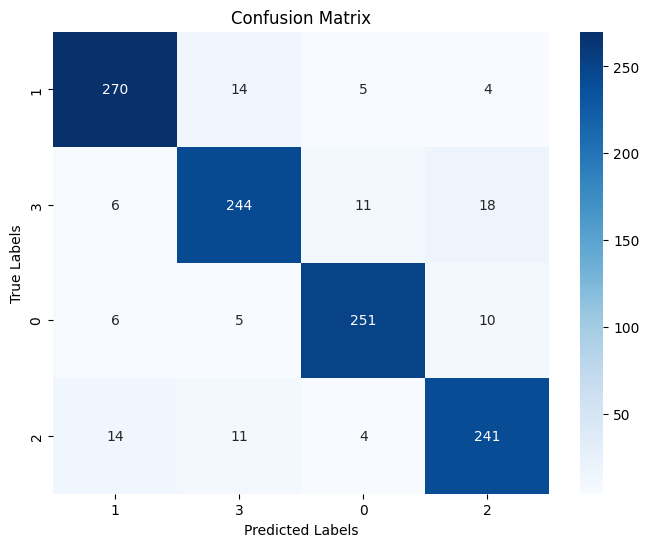

              precision    recall  f1-score   support

           1       0.91      0.92      0.92       293
           3       0.89      0.87      0.88       279
           0       0.93      0.92      0.92       272
           2       0.88      0.89      0.89       270

    accuracy                           0.90      1114
   macro avg       0.90      0.90      0.90      1114
weighted avg       0.90      0.90      0.90      1114



In [72]:
model = RandomForestClassifier(random_state=42)
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
predictions = cross_val_predict(model, features, labels, cv=kf)
cm = confusion_matrix(labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(labels, predictions, target_names=classes))

# XG Boost With Pytorch features

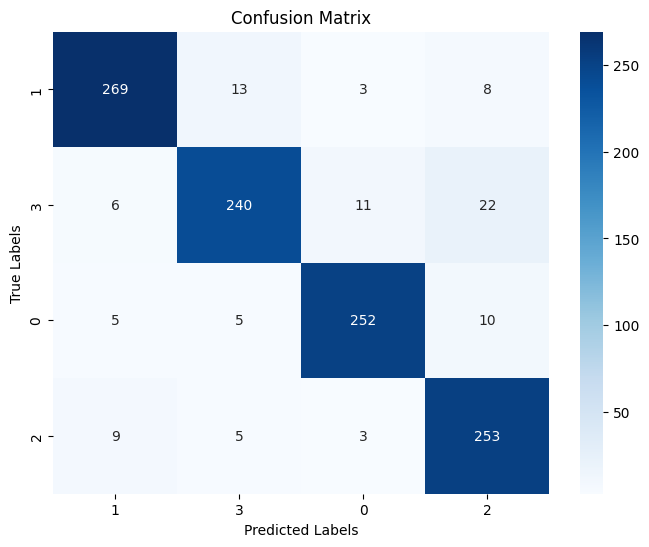

              precision    recall  f1-score   support

           1       0.93      0.92      0.92       293
           3       0.91      0.86      0.89       279
           0       0.94      0.93      0.93       272
           2       0.86      0.94      0.90       270

    accuracy                           0.91      1114
   macro avg       0.91      0.91      0.91      1114
weighted avg       0.91      0.91      0.91      1114



In [74]:
model2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
predictions2 = cross_val_predict(model2, features, labels, cv=kf)
cm = confusion_matrix(labels, predictions2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(labels, predictions2, target_names=classes))